#                                            Stock Market Analysis using Data Science

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.

We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2020.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for here.


### The Imports


In [17]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

# Optional Plotly Method Import
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** We will be Using [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

# Load Data From Servers.

In [18]:
BAC = web.DataReader('BAC', 'stooq')   #Bank of America
C = web.DataReader('C', 'stooq')       # CitiGroup
GS = web.DataReader('GS', 'stooq')     # Goldman Sachs
JPM = web.DataReader('JPM', 'stooq')   #JPMorgan Chase
MS = web.DataReader('MS', 'stooq')     # Morgan Stanley
WFC = web.DataReader('WFC', 'stooq')   # Wells Fargo

# Check For Updates in date

In [19]:
BAC

,Open,High,Low,Close,Volume
Date,,,,,
2020-06-22,24.890,25.025,24.610,24.620,55484307
2020-06-19,25.440,25.490,24.490,25.250,127563637
2020-06-18,24.700,25.490,24.580,25.040,53419011
2020-06-17,25.900,25.900,24.920,25.000,58349482
2020-06-16,26.180,26.240,24.860,25.800,96796548
...,...,...,...,...,...
2015-07-01,15.747,15.800,15.599,15.717,68271790
2015-06-30,15.589,15.635,15.383,15.536,97547603
2015-06-29,15.635,15.747,15.391,15.417,108025838


# tickers, To Concatinate The Data

In [20]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [21]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], keys=tickers, axis=1)
bank_stocks

BAC                                          C                  \
              Open    High     Low   Close     Volume    Open    High     Low   
Date                                                                            
2020-06-22  24.890  25.025  24.610  24.620   55484307  51.850  52.570  51.520   
2020-06-19  25.440  25.490  24.490  25.250  127563637  54.060  54.090  51.560   
2020-06-18  24.700  25.490  24.580  25.040   53419011  52.670  53.650  52.030   
2020-06-17  25.900  25.900  24.920  25.000   58349482  54.700  54.800  52.880   
2020-06-16  26.180  26.240  24.860  25.800   96796548  56.300  56.400  52.320   
...            ...     ...     ...     ...        ...     ...     ...     ...   
2015-07-01  15.747  15.800  15.599  15.717   68271790  51.060  51.060  50.348   
2015-06-30  15.589  15.635  15.383  15.536   97547603  50.613  50.760  49.965   
2015-06-29  15.635  15.747  15.391  15.417  108025838  50.176  50.705  50.003   
2015-06-26  15.956  15.991  15.837  15.890   69108135  51.481  51.643  51.141   
2015-06-25  16.038  16.085  15.837  15.855   65483394  51.956  52.017  51.215   

                              ...      MS                                    \
             Close    Volume  ...    Open    High     Low   Close    Volume   
Date                          ...                                             
2020-06-22  52.060  22642122  ...  46.800  47.610  46.550  47.380  11657353   
2020-06-19  52.920  50379310  ...  48.460  48.680  46.710  46.930  20962699   
2020-06-18  53.040  22280593  ...  47.120  48.375  46.970  47.580   9825246   
2020-06-17  53.000  23727272  ...  48.700  48.780  47.655  47.760   8674443   
2020-06-16  54.450  37638702  ...  49.440  49.600  46.910  48.560  13554814   
...            ...       ...  ...     ...     ...     ...     ...       ...   
2015-07-01  50.760  19312798  ...  35.073  35.137  34.825  34.986  11868955   
2015-06-30  50.358  19456873  ...  34.514  34.745  34.273  34.480  12490497   
2015-06-29  50.031  24418274  ...  34.505  34.844  34.044  34.052  12172041   
2015-06-26  51.363  13325820  ...  35.083  35.305  34.986  35.111   9366640   
2015-06-25  51.224  13356424  ...  35.395  35.440  34.790  34.861  10057412   

               WFC                                    
              Open    High     Low   Close    Volume  
Date                                                  
2020-06-22  27.270  27.625  26.890  27.350  32808327  
2020-06-19  28.000  28.050  27.010  27.600  71891222  
2020-06-18  27.100  27.925  26.930  27.550  33670192  
2020-06-17  28.500  28.550  27.350  27.450  38660809  
2020-06-16  29.430  29.650  27.770  28.520  52985585  
...            ...     ...     ...     ...       ...  
2015-07-01  48.078  48.169  47.672  47.922  14446157  
2015-06-30  47.614  47.900  47.150  47.362  20599037  
2015-06-29  47.833  48.161  47.167  47.208  22906186  
2015-06-26  48.286  48.489  48.144  48.369  20158579  
2015-06-25  48.614  48.667  48.109  48.144  16688495  

[1257 rows x 30 columns]

# Save Data in File

In [22]:
bank_stocks.to_csv('my_bank_stocks.csv')

** Set the column name levels (this is filled out for you):**

# Add Column Names

In [23]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

# Check Head() 

In [24]:
bank_stocks.head()

Bank Ticker    BAC                                       C                \
Stock Info    Open    High    Low  Close     Volume   Open   High    Low   
Date                                                                       
2020-06-22   24.89  25.025  24.61  24.62   55484307  51.85  52.57  51.52   
2020-06-19   25.44  25.490  24.49  25.25  127563637  54.06  54.09  51.56   
2020-06-18   24.70  25.490  24.58  25.04   53419011  52.67  53.65  52.03   
2020-06-17   25.90  25.900  24.92  25.00   58349482  54.70  54.80  52.88   
2020-06-16   26.18  26.240  24.86  25.80   96796548  56.30  56.40  52.32   

Bank Ticker                   ...     MS                                   \
Stock Info   Close    Volume  ...   Open    High     Low  Close    Volume   
Date                          ...                                           
2020-06-22   52.06  22642122  ...  46.80  47.610  46.550  47.38  11657353   
2020-06-19   52.92  50379310  ...  48.46  48.680  46.710  46.93  20962699   
2020-06-18   53.04  22280593  ...  47.12  48.375  46.970  47.58   9825246   
2020-06-17   53.00  23727272  ...  48.70  48.780  47.655  47.76   8674443   
2020-06-16   54.45  37638702  ...  49.44  49.600  46.910  48.56  13554814   

Bank Ticker    WFC                                  
Stock Info    Open    High    Low  Close    Volume  
Date                                                
2020-06-22   27.27  27.625  26.89  27.35  32808327  
2020-06-19   28.00  28.050  27.01  27.60  71891222  
2020-06-18   27.10  27.925  26.93  27.55  33670192  
2020-06-17   28.50  28.550  27.35  27.45  38660809  
2020-06-16   29.43  29.650  27.77  28.52  52985585  

[5 rows x 30 columns]

# EDA
#### Exploratory data analysis
Let's explore the data a bit! Before continuing.
In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

### What is the max Close price for each bank's stock throughout the time period?

In [25]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     35.169
C       80.515
GS     261.710
JPM    138.750
MS      56.637
WFC     59.723
dtype: float64

# Returns of Stocks

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [26]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [27]:
for tick in tickers:
    returns[tick + ' Return'] = bank_stocks[tick].xs(key='Close', axis=1,).pct_change()

In [28]:
returns

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2020-06-22,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-19,0.025589,0.016519,-0.008800,0.010956,-0.009498,0.009141
2020-06-18,-0.008317,0.002268,0.010961,0.011553,0.013850,-0.001812
2020-06-17,-0.001597,-0.000754,0.011529,0.005458,0.003783,-0.003630
2020-06-16,0.032000,0.027358,0.016490,0.025935,0.016750,0.038980
...,...,...,...,...,...,...
2015-07-01,0.011065,0.005567,0.003473,0.008189,0.009289,0.002951
2015-06-30,-0.011516,-0.007920,-0.005424,-0.011047,-0.014463,-0.011686
2015-06-29,-0.007660,-0.006494,-0.005558,-0.008280,-0.012413,-0.003252


# Comparision of Returns of Stocks.

** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

### Line Plot Comparision

In [29]:
returns.loc['2020-06-19':'2020-01-01'].iplot()

### Bar plot

In [30]:
returns.loc['2020-06-19':'2020-01-01'].sum().iplot(kind='bar')

### Histogram plot

In [31]:
returns.loc['2020-06-19':'2020-01-01'].iplot(kind='hist')

# PAIRPLOT, Take a lot of time

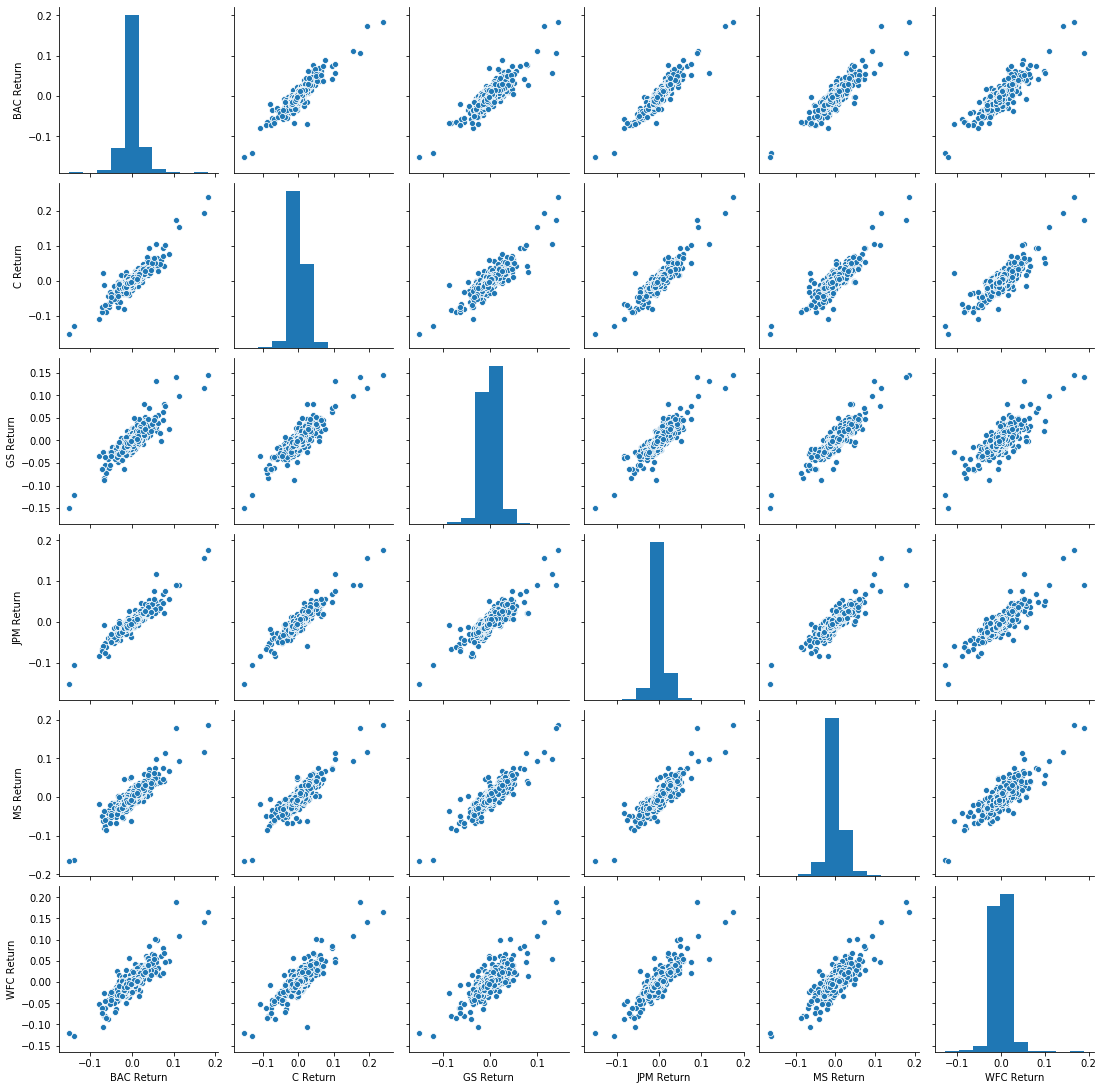

In [32]:
sns.pairplot(returns)

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that All of the banks share the same day for the worst drop, did anything significant happen that day?**

# Corona Crisis

### Dates of Minimum Closing Price

In [33]:
returns.idxmin()

BAC Return   2020-03-12
C Return     2020-03-12
GS Return    2020-03-12
JPM Return   2020-03-12
MS Return    2020-03-12
WFC Return   2020-03-23
dtype: datetime64[ns]

** You should have noticed that Each group's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

### Dates of Maximun Closing Price

In [34]:
returns.idxmax()

BAC Return   2020-03-13
C Return     2020-03-13
GS Return    2020-03-13
JPM Return   2020-03-13
MS Return    2020-03-13
WFC Return   2020-03-11
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2019 - 2020?**

# Riskiest Stock All Time

In [35]:
returns.std()

BAC Return    0.021538
C Return      0.023390
GS Return     0.019674
JPM Return    0.018699
MS Return     0.021848
WFC Return    0.020092
dtype: float64

# Riskiest From 2019 - 2020

In [36]:
returns.loc['2020-06-19':'2019-01-01'].std()     # 1 January 2019  to 19 june 2020

BAC Return    0.029834
C Return      0.035130
GS Return     0.027173
JPM Return    0.027146
MS Return     0.029722
WFC Return    0.030143
dtype: float64

### WFC Distplot

** Create a distplot using seaborn of the 2019 - 2020 returns for Wells Fargo **

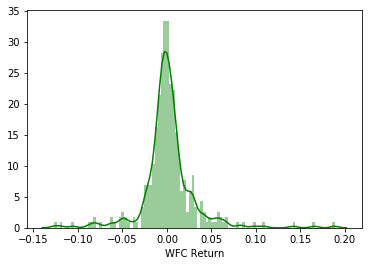

In [37]:
WFC19_20 = returns['WFC Return'].loc['2020-06-19':'2019-01-01']
sns.distplot(WFC19_20, bins=100, color='green')

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.


** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

### Line Chart of Stock Market Crisis

In [38]:
d_2019_2020 = bank_stocks.xs(key='Close', axis=1, level='Stock Info').loc['2020-06-19':'2019-01-01' ]
d_2019_2020.iplot()

### Who has lost the Race

In [39]:
d_2019_2020.iplot(kind='hist')

** Create a heatmap of the correlation between the stocks Close Price.**

### HeatMap Both Types

In [40]:
march_close_data = bank_stocks.xs(key='Close', axis=1, level='Stock Info').loc['2020-03-31':'2020-03-01' ]

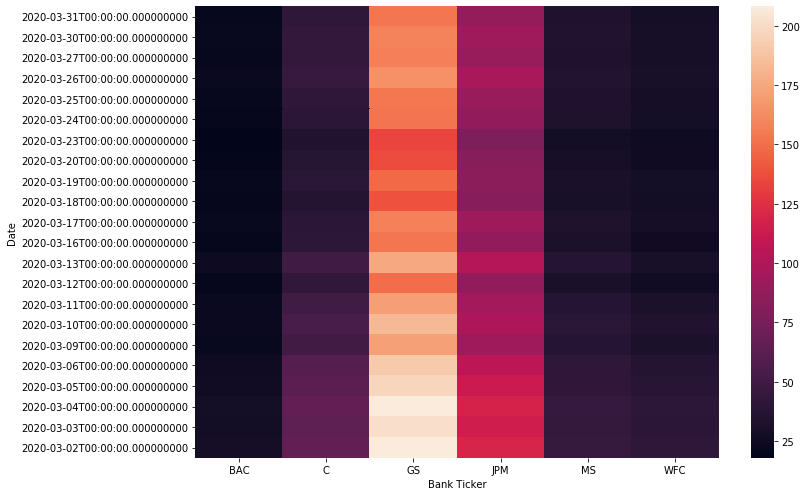

In [41]:
plt.figure(figsize=(12,7))
sns.heatmap(march_close_data)
plt.tight_layout()

# Only March

In [42]:
close_2020 = bank_stocks.xs(key='Close', axis=1, level='Stock Info').loc['2020-04-30':'2020-02-01' ]
close_2020.iplot(kind='heatmap', colorscale='rdylbu')

** Optional: Use seaborn's clustermap to cluster the correlations together:**

### Clustermap

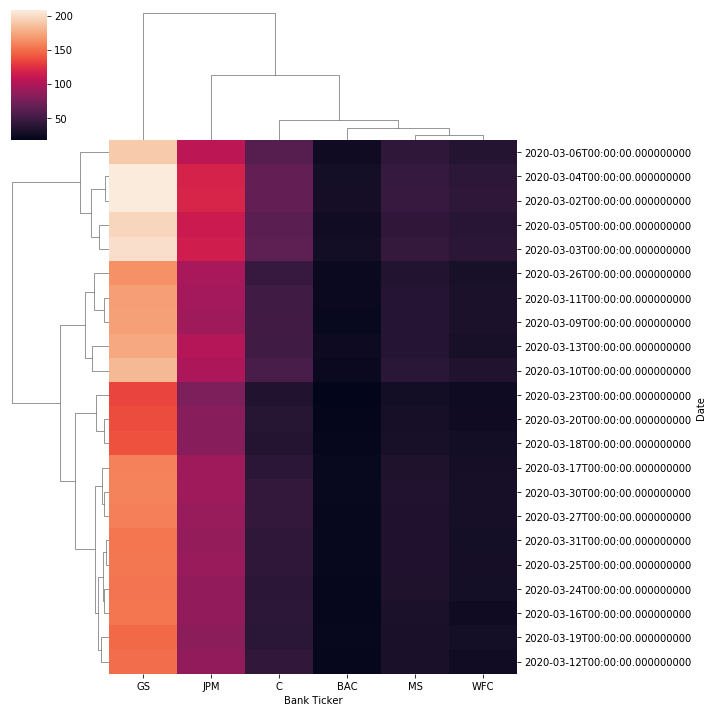

In [43]:
sns.clustermap(march_close_data)

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.

# Linear Regression

In [44]:
BAC.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-06-22,24.89,25.025,24.61,24.62,55484307
2020-06-19,25.44,25.490,24.49,25.25,127563637
2020-06-18,24.70,25.490,24.58,25.04,53419011
2020-06-17,25.90,25.900,24.92,25.00,58349482
2020-06-16,26.18,26.240,24.86,25.80,96796548


In [45]:
bac_lm = BAC.copy()

In [46]:
bac_lm

,Open,High,Low,Close,Volume
Date,,,,,
2020-06-22,24.890,25.025,24.610,24.620,55484307
2020-06-19,25.440,25.490,24.490,25.250,127563637
2020-06-18,24.700,25.490,24.580,25.040,53419011
2020-06-17,25.900,25.900,24.920,25.000,58349482
2020-06-16,26.180,26.240,24.860,25.800,96796548
...,...,...,...,...,...
2015-07-01,15.747,15.800,15.599,15.717,68271790
2015-06-30,15.589,15.635,15.383,15.536,97547603
2015-06-29,15.635,15.747,15.391,15.417,108025838


In [47]:
bac_lm.reset_index(drop=True, inplace=True)

In [48]:
bac_lm

,Open,High,Low,Close,Volume
0,24.890,25.025,24.610,24.620,55484307
1,25.440,25.490,24.490,25.250,127563637
2,24.700,25.490,24.580,25.040,53419011
3,25.900,25.900,24.920,25.000,58349482
4,26.180,26.240,24.860,25.800,96796548
...,...,...,...,...,...
1252,15.747,15.800,15.599,15.717,68271790
1253,15.589,15.635,15.383,15.536,97547603
1254,15.635,15.747,15.391,15.417,108025838
1255,15.956,15.991,15.837,15.890,69108135


In [49]:
X = bac_lm[['Open', 'High', 'Low']]

In [50]:
X

,Open,High,Low
0,24.890,25.025,24.610
1,25.440,25.490,24.490
2,24.700,25.490,24.580
3,25.900,25.900,24.920
4,26.180,26.240,24.860
...,...,...,...
1252,15.747,15.800,15.599
1253,15.589,15.635,15.383
1254,15.635,15.747,15.391
1255,15.956,15.991,15.837


In [51]:
y = bac_lm['Close']

In [52]:
y

0       24.620
1       25.250
2       25.040
3       25.000
4       25.800
         ...  
1252    15.717
1253    15.536
1254    15.417
1255    15.890
1256    15.855
Name: Close, Length: 1257, dtype: float64

In [53]:
# Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [54]:
# LR Model

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
lm.coef_

array([-0.53213174,  0.76193055,  0.77027083])

In [56]:
predicted_y = lm.predict(X_test)

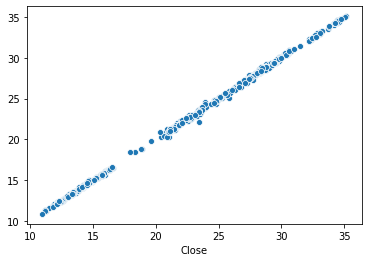

In [57]:
sns.scatterplot(y_test, predicted_y)

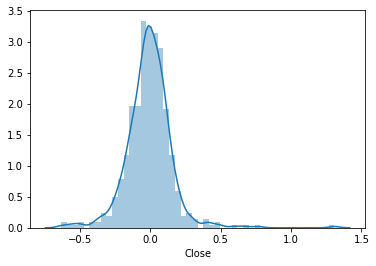

In [58]:
sns.distplot((y_test - predicted_y))   # If the distribution is NORMAL then, model is good.